# 6. Problem nadmiernego dopasowania
## Część A (4 punkty)
Plik data6.tsv zawiera pewne dane. Zastosuj do nich regresję wielomianową:

1. pierwszego stopnia (funkcja liniowa)
2. drugiego stopnia (funkcja kwadratowa)
3. piątego stopnia (wielomian 5. stopnia*)

Uzyskane krzywe regresji przedstaw na wykresie.

Czy w którymś z powyższych przypadków występuje zjawisko nadmiernego dopasowania?

In [46]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model


In [11]:
data = pandas.read_csv('data6.tsv', sep='\t')
data_matrix = np.matrix(data)

In [16]:
def cost(theta, X, y):
    """Wersja macierzowa funkcji kosztu"""
    m = len(y)
    J = 1.0 / (2.0 * m) * ((X * theta - y).T * (X * theta - y))
    return J.item()

def gradient(theta, X, y):
    """Wersja macierzowa gradientu funkcji kosztu"""
    return 1.0 / len(y) * (X.T * (X * theta - y)) 

def gradient_descent(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-5):
    """Algorytm gradientu prostego (wersja macierzowa)"""
    current_cost = fJ(theta, X, y)
    logs = [[current_cost, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y)
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if abs(prev_cost - current_cost) > 10**15:
            print('Algorithm does not converge!')
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        logs.append([current_cost, theta]) 
    return theta, logs

def plot_data(X, y, xlabel, ylabel):
    """Wykres danych (wersja macierzowa)"""
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter([X[:, 1]], [y], c='r', s=50, label='Dane')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(.05, .05)
    plt.ylim(y.min() - 100, y.max() + 100)
    plt.xlim(np.min(X[:, 1]) - 0.2, np.max(X[:, 1]) + 0.2)
    return fig

def plot_fun(fig, fun, X, label):
    """Wykres funkcji `fun`"""
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 0.2
    x1 = np.max(X[:, 1]) + 0.2
    Arg = np.arange(x0, x1, 0.1)
    Val = fun(Arg)
    return ax.plot(Arg, Val, linewidth='2', label = label)

def h_poly(Theta, x):
    """Funkcja wielomianowa"""
    return sum(theta * np.power(x, i) for i, theta in enumerate(Theta.tolist()))

def polynomial_regression(theta):
    """Funkcja regresji wielomianowej"""
    return lambda x: h_poly(theta, x)

In [17]:
m, n_plus_1 = data_matrix.shape
n = n_plus_1 - 1

Xn = data_matrix[:, 0:n]
Xn /= np.amax(Xn, axis=0)

Xn2 = np.power(Xn, 2) 
Xn2 /= np.amax(Xn2, axis=0)

Xn3 = np.power(Xn, 3) 
Xn3 /= np.amax(Xn3, axis=0)

Xn4 = np.power(Xn, 4) 
Xn4 /= np.amax(Xn4, axis=0)

Xn5 = np.power(Xn, 5) 
Xn5 /= np.amax(Xn5, axis=0)

X = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n + 1)
X2 = np.matrix(np.concatenate((np.ones((m, 1)), Xn, Xn2), axis=1)).reshape(m, 2 * n + 1)
X3 = np.matrix(np.concatenate((np.ones((m, 1)), Xn, Xn2, Xn3), axis=1)).reshape(m, 3 * n + 1)
X4 = np.matrix(np.concatenate((np.ones((m, 1)), Xn, Xn2, Xn3, Xn4), axis=1)).reshape(m, 4 * n + 1)
X5 = np.matrix(np.concatenate((np.ones((m, 1)), Xn, Xn2, Xn3, Xn4, Xn5), axis=1)).reshape(m, 5 * n + 1)
y = np.matrix(data_matrix[:, -1]).reshape(m, 1)

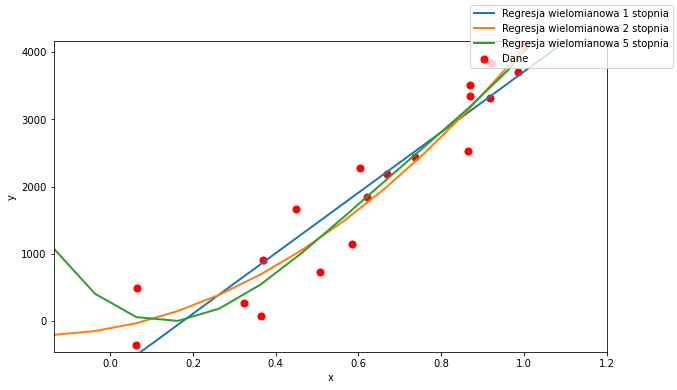

In [18]:
fig = plot_data(X, y, xlabel='x', ylabel='y')

# 1st degree polynomial
theta_start = np.matrix([0, 0]).reshape(2, 1)
theta, logs = gradient_descent(cost, gradient, theta_start, X, y)
plot_fun(fig, polynomial_regression(theta), X, "Regresja wielomianowa 1 stopnia")

# 2nd degree polynomial
theta_start = np.matrix([0, 0, 0]).reshape(3, 1)
theta, logs = gradient_descent(cost, gradient, theta_start, X2, y)
plot_fun(fig, polynomial_regression(theta), X, "Regresja wielomianowa 2 stopnia")

# 5th degree polynomial
theta_start = np.matrix([0, 0, 0, 0, 0, 0]).reshape(6, 1)
theta, logs = gradient_descent(cost, gradient, theta_start, X5, y)
plot_fun(fig, polynomial_regression(theta), X, "Regresja wielomianowa 5 stopnia")

fig.legend()

W przypadku regresji wielomianowej 5 stopnia występuje zjawisko nadmiernego dopasowania

## Część B (2 punkty)

Teraz do powyższych danych zastosuj regresję liniową 5. stopnia (wielomian 5. stopnia*), ale z regularyzacją.

Czy zjawisko nadmiernego dopasowania nadal występuje?

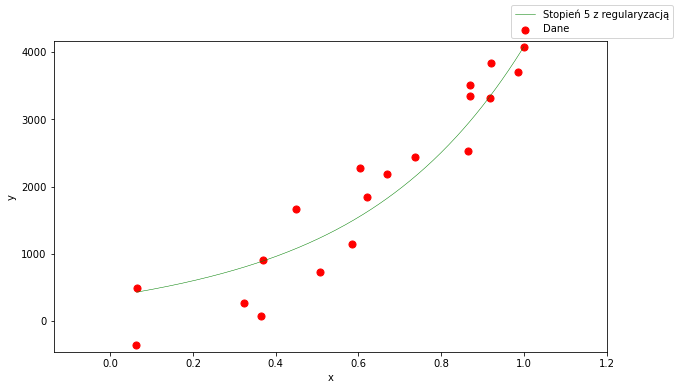

In [62]:
model = make_pipeline(PolynomialFeatures(5), Ridge(alpha=1.0))

Xdf = pandas.DataFrame(Xn)
ydf = pandas.DataFrame(y)

model.fit(Xdf, ydf)

fig = plot_data(X, y, xlabel='x', ylabel='y')

X_seq = np.linspace(Xdf.min(), Xdf.max(), 300).reshape(-1, 1)

ax = fig.axes[0]
ax.plot(X_seq, model.predict(X_seq), color="green", linewidth=0.5, label="Stopień 5 z regularyzacją")

fig.legend()

Tu nie występuje zjawisko nadmiernego dopasowania